# Bank Customer Churn Prediction

- kresnaandika36@gmail.com
- github.com/kresnandika

**This code is all my own with some references, feel free to use it**



---


# Introduction

A manager at a local bank is disturbed with more and more customers leaving their credit card services. They need a way of predicting which customers are most likely to stop using their credit card products (Customer Churn) in order to proactively check in on the customer to provide them better services in order to convince them to change their minds. You are given a dataset of 10,000 customers with 18 features per customer. Roughly 16% of the current customer base have churned so far, so it will be difficult to predict the ones who will.

As you analyze the data, before you create the model, the sales team also needs you to determine the most influential factors that can lead to a customer's decision of leaving the business. The head of the sales department is expecting a report that helps them visualize where the differences lie between churning and non-churning customers.

# Business Understanding

To define the success of the solution that we will deliver let's define the metrics as: F1 Score, Precision and Recall. This metrics were chosen since normally churn problems are imbalanced, but all depends on the definition of churn and the cost driven by each scenario.

## Objective


1. Identify which customers are most likely to be churned so the bank manager knows who to provide a better service to
  - The Top Priority is to identify churning customers,as if we predict non-churning customers as churned, it won't harm our business, but predicting churning customers as Non-churning will. False negatives won't hurt us, but False Positives do
  - This task is binary classification
2. A clean and easy to understand visual report that helps the sales team better visualize what makes a client churn or not churn
3. Precision and Recall Curves as well as the Confusion Matrix will also be used

**Performance of the model will be mesured with accuracy and the rate of False Positives. The manager is looking for at least a 90% F1 Score accuracy**

## Issues

since only 16% of the customers are churned, a data upsampling method is needed to match them with the regular customer size to give our model a better chance of catching small details that would be missed had we not upsampled it


# Data Understanding



## Getting the Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from google.colab import drive

drive.mount('/content/drive/')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Mounted at /content/drive/


In [2]:
data = pd.read_csv('/content/drive/MyDrive/datasets/BankChurners.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


The Backend Engineer at the bank gives us the data through their MySQL database in an easy to use CSV with all missing features replaced by an "unkown" string. However, he tried to train a Naive Bayes classifier and accidently left in 2 prediction columns in the data. No Worries. We'll also remove the Clientnumber as this isn't important

In [3]:
data = data.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',1)
data = data.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 1)
data = data.drop('CLIENTNUM', 1)

## Feature Description


- CLIENTNUM: Client number. Unique identifier for the customer holding the account

- Customer_Age: Demographic variable - Customer's Age in Years

- Gender: Demographic variable - M=Male, F=Female

- Dependent_count: Demographic variable - Number of dependents

- Education_Level: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

- Marital_Status: Demographic variable - Married, Single, Divorced, Unknown

- Income_Category: Demographic variable - Annual Income Category of the account holder (<  40K, 40K - 60K,  60K− 80K,  80K− 120K, > $120K, Unknown)

- Card_Category: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

- Months_on_book: Period of relationship with bank

- Total_Relationship_Count: Total no. of products held by the customer

- Months_Inactive_12_mon: No. of months inactive in the last 12 months

- Contacts_Count_12_mon: No. of Contacts in the last 12 months

- Credit_Limit: Credit Limit on the Credit Card

- Total_Revolving_Bal: Total Revolving Balance on the Credit Card

- Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)

- Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)

- Total_Trans_Amt: Total Transaction Amount (Last 12 months)

- Total_Trans_Ct: Total Transaction Count (Last 12 months)

- Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)

- Avg_Utilization_Ratio: Average Card Utilization Ratio

## Target

Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1(Attrited Customer) else 0(Existing Customer)

# Exploring the Data

The report for the sales team begins here

In [4]:
import seaborn as sns
import plotly.express as plx
import matplotlib.pyplot as plt

In [5]:
cat_features = data.select_dtypes(['object','category']).columns.to_list()

for cat in cat_features:
    fig = plx.pie(data[cat].value_counts(False), values=cat, names = data[cat].value_counts(False).index,title = cat,template='ggplot2')
    fig.show()

The customer gender is almost even, 30% college graduates with half being either Highschool graduates, unkown, or uneducated. The remaining 40% are either current college students,or grad students.

Almost half are married, 38% single, and the remaining 12 are divorced or unkown. 35% of customers make less than $40k per year which is near the poverty threshold. The rest are more evenly spaced out. 93% of customers choose the cheapest card option (likely the lowest interest rate) with a tiny portion choosing the more expensive cards

In [6]:
fig = plx.box(data, color="Attrition_Flag", y="Total_Relationship_Count",title='Number of products held by customer', points="all")
fig.show()

Churned customers are likely to hold less credit cards than existing customers which is shown by a lower median . Is there a deal you provide that favors customers with multiple credit cards? (Like customers with spouses, families, or buisnesses that need additional cards).

In [7]:
fig = plx.box(data, color="Attrition_Flag", y="Months_Inactive_12_mon", points="all",title='Number of months with no transactions in the last year')
fig.show()

Churned customers tend to have slightly more inactive months, but the distribution is more concentrated from the 1-4 months inactive (though this may be from the small sample size)

In [8]:
fig = plx.histogram(data, x="Credit_Limit", color="Attrition_Flag",title='Credit limit on the credit card')
fig.show()

Churned customers have a lower credit limit, so perhaps increase the credit limit for these

In [9]:
fig = plx.box(data, color="Attrition_Flag", y="Total_Revolving_Bal", points="all",title='Total revolving balance on the credit card')
fig.show()

Churned customers have a much smaller revolving balance which, because they don't fully pay off their credit card balance, may signify that they have less disposable income than staying customers that know they can pay off their revolving balance

In [10]:
fig = plx.histogram(data, x="Total_Trans_Ct", color="Attrition_Flag",title='Number of transactions made in the last year')
fig.show()

Churned customers will have a lower amount of transactions, which makes sense as they're less involved with this company and will have a smaller transaction change over time as displayed bellow

In [11]:
fig = fig = plx.box(data, color="Attrition_Flag", y="Total_Ct_Chng_Q4_Q1", points="all",title='Change in transaction number over the last year (Q4 over Q1)')
fig.show()

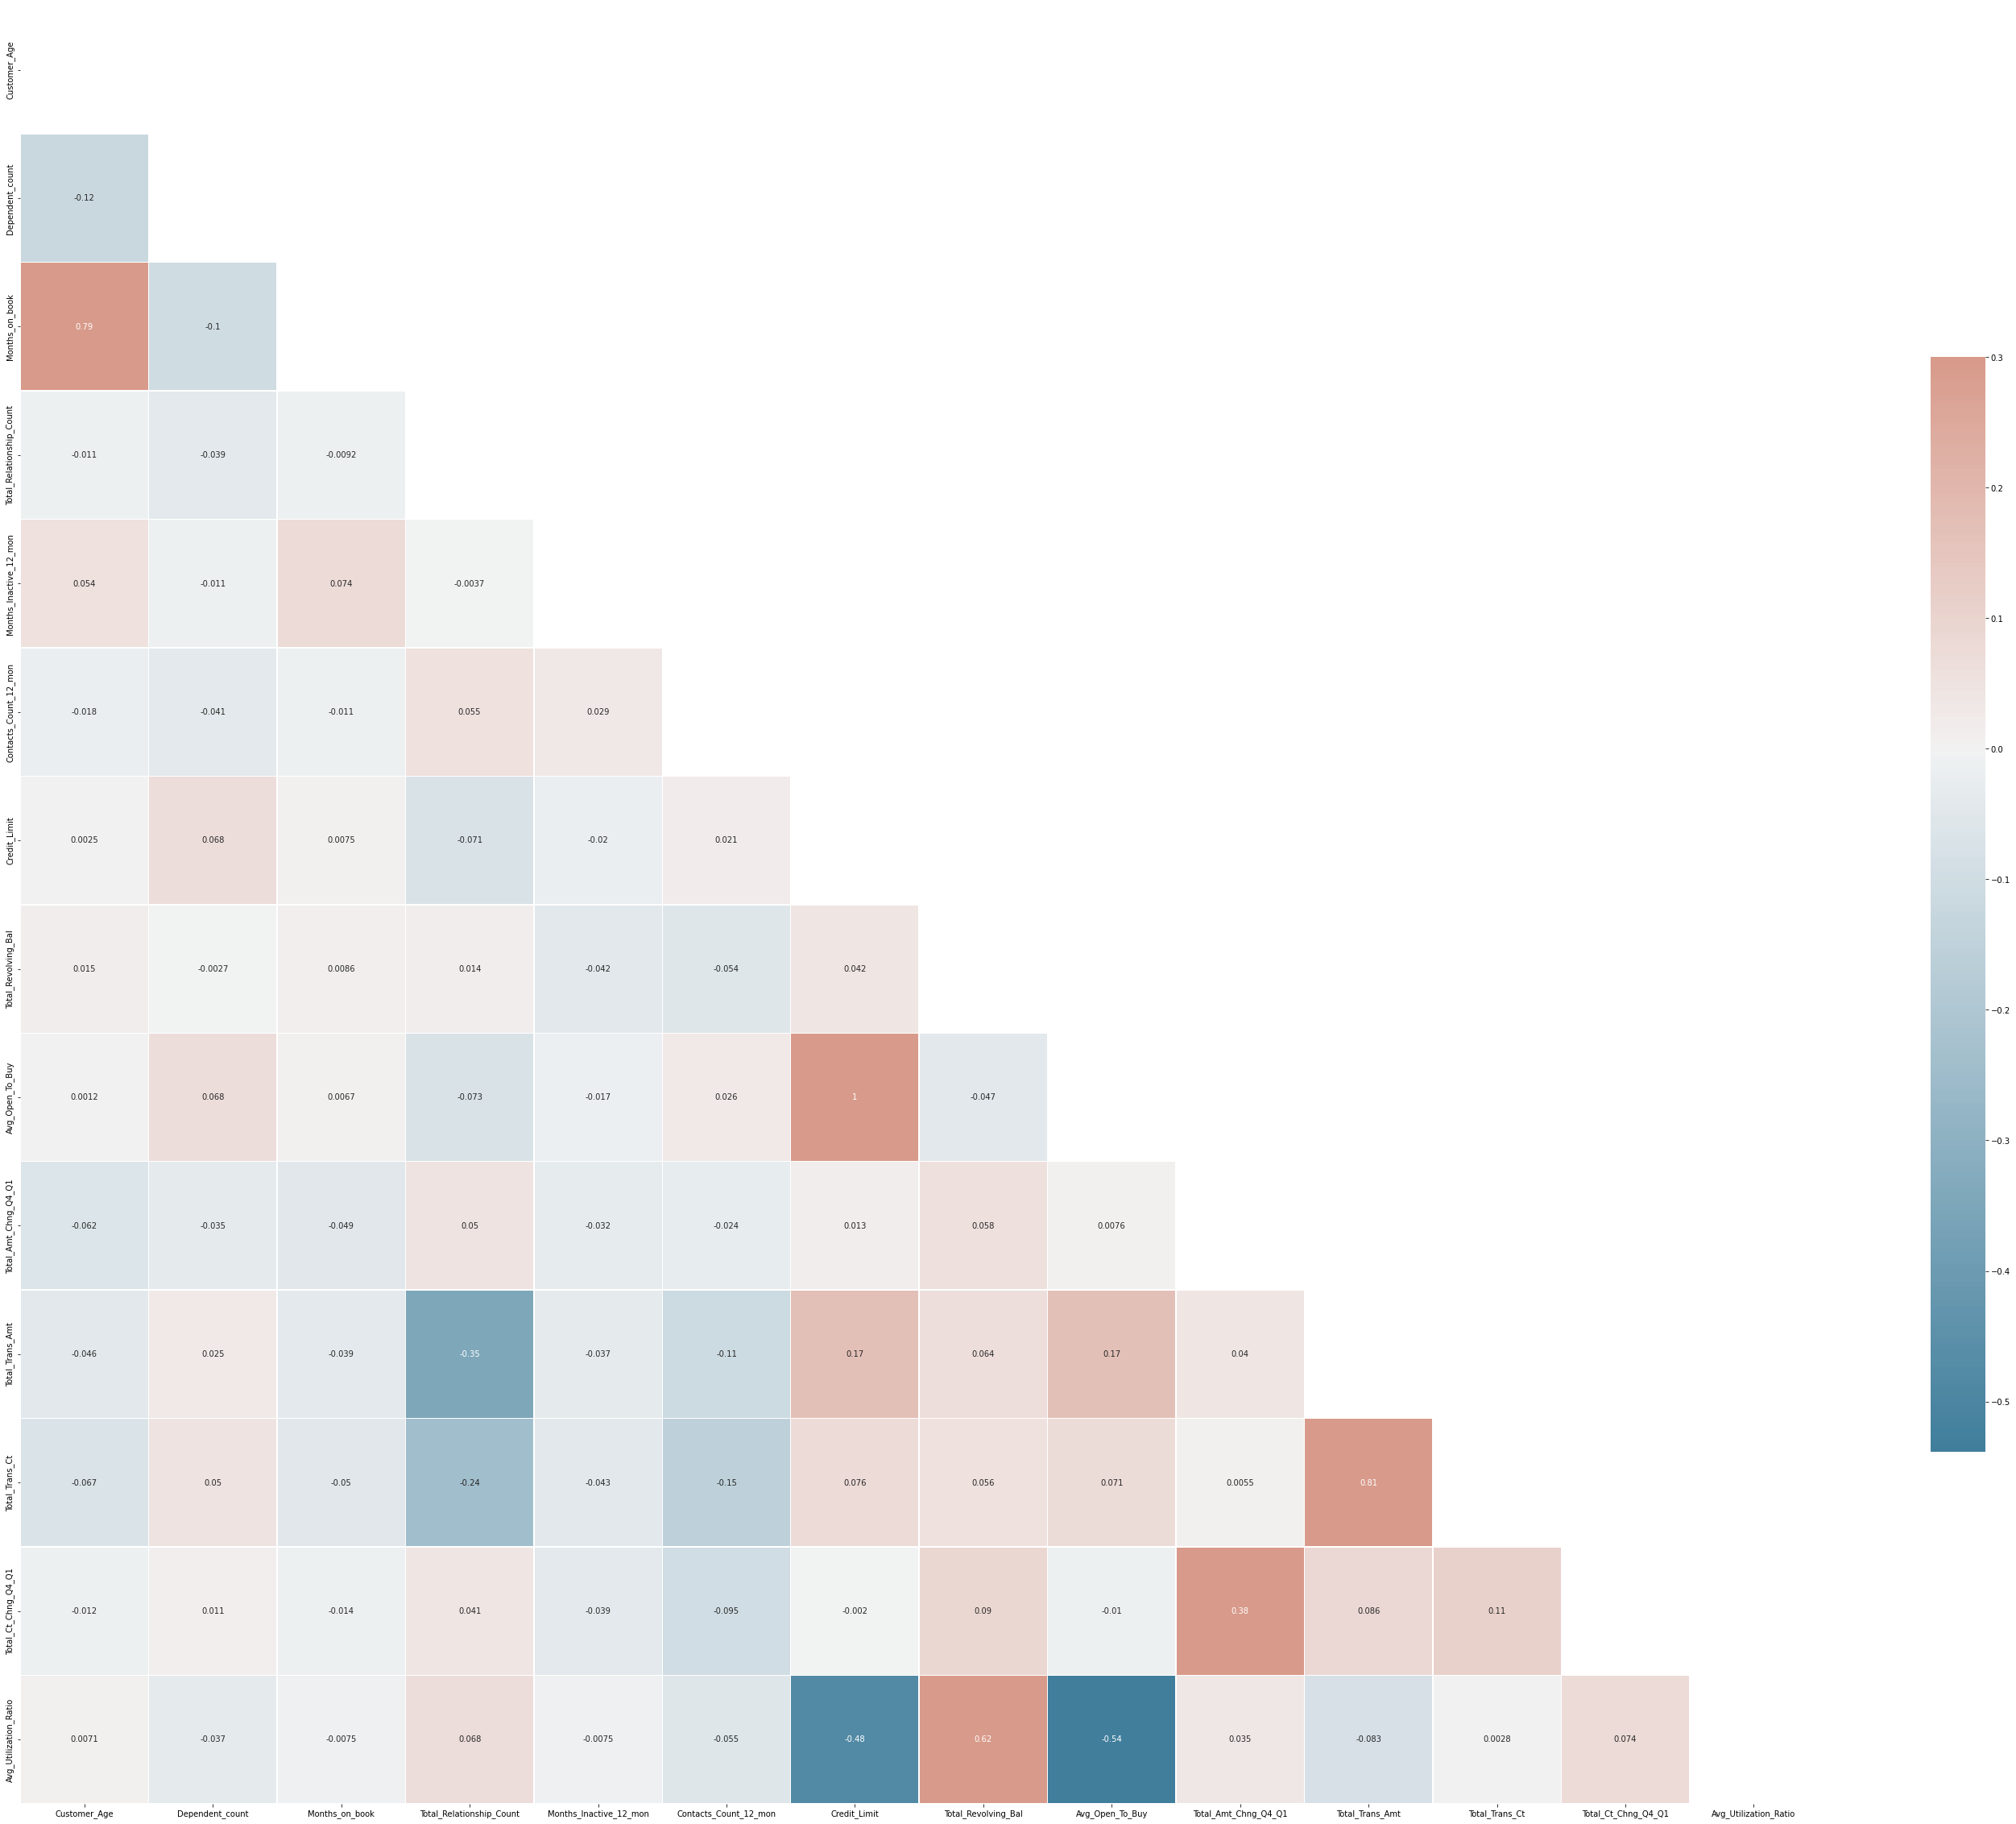

In [12]:
def display_correlation_matrix(data):
    """ Displays a correlation matrix for a dataset """
    corr = data.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    f, ax = plt.subplots(figsize=(50, 50))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
       square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})
    
display_correlation_matrix(data)

**A lower Total Transaction change,revolving balance, and higher Number of contacts within the past year are most correlated with a churning customer**

The following features are the most correlated (> 0.75%)

- The months of being a customer with the bank(months on the book) and the Age are positive
- Credit Limit and Average Open To Buy Credit Line are also positive

The following are moderately correlated (30-75%)

- Total Transaction count and Total Relationship count are negative
- Credit Limit and Average Utilization Ratio are negative
Total Revolving balance and Average Utilization Ratio are positive
Average Open To Buy and Average Utilization Ration are negative

# Data Preprocessing

In [13]:
data_copy = data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

## Converting Categorical Features

If you are familiar with machine learning, you will probably have encountered categorical features in many datasets. These generally include different categories or levels associated with the observation, which are non-numerical and thus need to be converted so the computer can process them.

In [14]:
data_cat = data[cat_features]
data_cat

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10123,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue
10125,Attrited Customer,M,Graduate,Unknown,$40K - $60K,Blue


In [15]:
a_map = {'Attrited Customer':1, 'Existing Customer':0}
data['Attrition_Flag'] = data['Attrition_Flag'].map(a_map)

In [16]:
g_map = {'M':0, 'F':1}
data['Gender'] = data['Gender'].map(g_map)

In [17]:
from sklearn.preprocessing import OrdinalEncoder

marital = OrdinalEncoder(categories=[['Unknown','Single','Married','Divorced']])
data['Marital_Status'] = marital.fit_transform(data_cat[['Marital_Status']])

In [18]:
edu = OrdinalEncoder(categories=[['Unknown', 'Uneducated', 'High School', 'College','Graduate',
                                  'Post-Graduate','Doctorate']])
data['Education_Level'] = edu.fit_transform(data_cat[['Education_Level']])

In [19]:
income = OrdinalEncoder(categories=[['Unknown','Less than $40K','$40K - $60K','$60K - $80K',
                                     '$80K - $120K','$120K +']])
data['Income_Category'] = income.fit_transform(data_cat[['Income_Category']])

In [20]:
card = OrdinalEncoder(categories=[['Blue', 'Silver','Gold','Platinum']])
data['Card_Category'] = card.fit_transform(data_cat[['Card_Category']])

In [21]:
data[cat_features].head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,0,0,2.0,2.0,3.0,0.0
1,0,1,4.0,1.0,1.0,0.0
2,0,0,4.0,2.0,4.0,0.0
3,0,1,2.0,0.0,1.0,0.0
4,0,0,1.0,2.0,3.0,0.0


## Scaling Continuous Features

Feature Scaling or Standardization: It is a step of Data Pre Processing that is applied to independent variables or features of data. It basically helps to normalize the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm.

**Why and Where to Apply Feature Scaling?**

The real-world dataset contains features that highly vary in magnitudes, units, and range. Normalization should be performed when the scale of a feature is irrelevant or misleading and not should Normalise when the scale is meaningful.

In [22]:
cont = data.select_dtypes(['float64','int64','category']).columns.to_list()
data_cont = data[cont]
data_cont.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,2.0,2.0,3.0,0.0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,4.0,1.0,1.0,0.0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,4.0,2.0,4.0,0.0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,2.0,0.0,1.0,0.0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,1.0,2.0,3.0,0.0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [23]:
from sklearn.preprocessing import StandardScaler

credit = StandardScaler()
data['Credit_Limit'] = credit.fit_transform(data_cont[['Credit_Limit']])

In [24]:
revolv_bal = StandardScaler()
data['Total_Revolving_Bal'] = revolv_bal.fit_transform(data_cont[['Total_Revolving_Bal']])

In [25]:
avg_open = StandardScaler()
data['Avg_Open_To_Buy'] = avg_open.fit_transform(data_cont[['Avg_Open_To_Buy']])

In [26]:
trans = StandardScaler()
data['Total_Trans_Amt'] = trans.fit_transform(data_cont[['Total_Trans_Amt']])

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

def preprocessCustomersPipeline(data):
    """Prepares the original customers data table in a form ready for the Deep Learning model, using
    all the transformations and edits we used above, and returns a ready dataset"""

    data = data.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',1)
    data = data.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 1)
    data = data.drop('CLIENTNUM', 1)
    
    #Categorical Features
    a_map = {'Attrited Customer':1, 'Existing Customer':0}
    data['Attrition_Flag'] = data['Attrition_Flag'].map(a_map)
    g_map = {'M':0, 'F':1}
    data['Gender'] = data['Gender'].map(g_map)
    
    marital = OrdinalEncoder(categories=[['Unknown','Single','Married','Divorced']])
    data['Marital_Status'] = marital.fit_transform(data[['Marital_Status']])

    edu = OrdinalEncoder(categories=[['Unknown', 'Uneducated', 'High School', 'College','Graduate',
                                      'Post-Graduate','Doctorate']])
    data['Education_Level'] = edu.fit_transform(data[['Education_Level']])

    income = OrdinalEncoder(categories=[['Unknown','Less than $40K','$40K - $60K','$60K - $80K',
                                         '$80K - $120K','$120K +']])
    data['Income_Category'] = income.fit_transform(data[['Income_Category']])

    card = OrdinalEncoder(categories=[['Blue', 'Silver','Gold','Platinum']])
    data['Card_Category'] = card.fit_transform(data[['Card_Category']])
    
    #Numerical Features
    credit = StandardScaler()
    data['Credit_Limit'] = credit.fit_transform(data[['Credit_Limit']])
    revolv_bal = StandardScaler()
    data['Total_Revolving_Bal'] = revolv_bal.fit_transform(data[['Total_Revolving_Bal']])
    avg_open = StandardScaler()
    data['Avg_Open_To_Buy'] = avg_open.fit_transform(data[['Avg_Open_To_Buy']])
    trans = StandardScaler()
    data['Total_Trans_Amt'] = trans.fit_transform(data[['Total_Trans_Amt']])
    
    nums = ['Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Trans_Amt', 'Total_Trans_Ct']
    for n in nums:
        s = StandardScaler()
        data[n] = s.fit_transform(data[[n]])
    return data

## ML Model Shortlisting
Testing out a couple Machine Learning models before we use the Deep Neural Net

In [28]:
data_raw = pd.read_csv('/content/drive/MyDrive/datasets/BankChurners.csv')
data_raw_shuffled = data_raw.sample(frac=1)

train = data_raw_shuffled.iloc[2025:,:]
test = data_raw_shuffled.iloc[:2025,:]

train_p = preprocessCustomersPipeline(train)
test_p = preprocessCustomersPipeline(test)

In [29]:
X_train = train_p.iloc[:,1:]
y_train = train_p.iloc[:,0]
X_test = test_p.iloc[:,1:]
y_test = test_p.iloc[:,0]

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=5)
svc = SVC()
xgb = xgboost.XGBClassifier(use_label_encoder=False)

ml_models = [rf,knn,svc, xgb]
for ml in ml_models:
    ml.fit(X_train, y_train)
    y_pred = ml.predict(X_test)
    print(accuracy_score(y_pred,y_test))

0.9565432098765432
0.8716049382716049
0.837037037037037
0.9674074074074074


## The Neural Network
Since this is a standard binary classification problem, we'll use a shallow feedforward neural network with 19 input neurons and 2 output neurons

In [31]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Dense(19,input_shape=X_train.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(7, activation="elu", kernel_initializer="LecunNormal"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(2, activation="relu",  kernel_initializer="he_normal")
])

In [32]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=keras.optimizers.Nadam(learning_rate=0.001),metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
254/254 [==============================] - 2s 3ms/step - loss: 1.6425 - accuracy: 0.7762 - val_loss: 0.7367 - val_accuracy: 0.8390
Epoch 2/50
254/254 [==============================] - 1s 2ms/step - loss: 0.8883 - accuracy: 0.8335 - val_loss: 0.7217 - val_accuracy: 0.8405
Epoch 3/50
254/254 [==============================] - 1s 2ms/step - loss: 0.7715 - accuracy: 0.8420 - val_loss: 0.7331 - val_accuracy: 0.8415
Epoch 4/50
254/254 [==============================] - 1s 2ms/step - loss: 0.7502 - accuracy: 0.8456 - val_loss: 0.6056 - val_accuracy: 0.8504
Epoch 5/50
254/254 [==============================] - 1s 2ms/step - loss: 0.7387 - accuracy: 0.8473 - val_loss: 0.9091 - val_accuracy: 0.8370
Epoch 6/50
254/254 [==============================] - 1s 2ms/step - loss: 0.6809 - accuracy: 0.8451 - val_loss: 0.6230 - val_accuracy: 0.8459
Epoch 7/50
254/254 [==============================] - 1s 2ms/step - loss: 0.7099 - accuracy: 0.8450 - val_loss: 0.6906 - val_accuracy: 0.8435
Epoch 

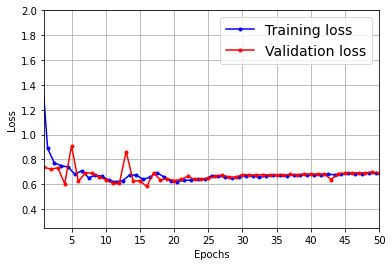

In [33]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.axis([1, 50, 0.25, 2])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [34]:
from sklearn.base import BaseEstimator, ClassifierMixin

#Translate the Tensorflow model into a Scikit-Learn model, so it can be used with the ensemble voting classifier
class NN(BaseEstimator, ClassifierMixin):
    def __init__(self, demo_param='demo'):
         self.demo_param = demo_param

    def fit(self, X, y):
        return self

    def predict(self, X):
        return model.predict(X)
    
    def predict_proba (self, X):
        return model.predict(X)

## Model Assemble
Ensembling our ML models together to get the highest possible accuracy. It's interesting how the Random Forest and XGBoost Classifiers got a 10% higher accuracy than the shallow neural network, for we did not need to tweak any of its hyperparameters. Perhaps Ockham's Razor is clearly shown here?

In [35]:
from sklearn.ensemble import VotingClassifier

rf = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=5)
svc = SVC(probability=True)
xgb = xgboost.XGBClassifier(use_label_encoder=False)
nn = NN()

voting_clf = VotingClassifier(estimators=[('rf',rf), ('knn', knn), ('svc',svc),('xgb',xgb), ('nn', nn)], voting="soft", weights=[1,0.2,0.2,1,0.6])
voting_clf.fit(X_train, y_train)
pred = voting_clf.predict(X_test)
print(accuracy_score(pred, y_test))

0.9595061728395061


# Conclusion:

- The highest accuracy achieved was 97% which went way above our manager's expectations. However, we have raised the bar, and in further problems, he will be expecting more
- Total Transaction change,revolving balance,and Number of contacts within the past year are most correlated with a churning customer